## Muhammad Ali Wahidiyan
## 2209106011
## A1'22

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## import semua library yang di butuhkan

## Supervised Learning

## jangan lupa read dataset dan tampilkan dengan untuk cek dan memastikan bahwa dataset kita sudah benar.

In [4]:
df = pd.read_csv('Predict_students_dropout_and_academic_success.csv')

df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


##  membuat variabel X sebanyak minimal 2 yang akan digunakan sebagai fitur dalam analisis data. Fitur-fitur ini dipilih dari DataFrame df dan terdiri dari dua kolom, yaitu 'Course' dan 'GPA'. untuk variabel y saya pilih 'Target' sebagai kategorikal

In [5]:
# Pilih kolom numerik sebagai fitur (misalnya 'Age' dan 'GPA')
X = df[['Course', 'GDP']]
# Kolom label kategorikal
y = df['Target']


## proses pembagian data menjadi dua set, yaitu set pelatihan (training set) dan set pengujian (test set), yang sering digunakan dalam pembuatan model prediktif. Mari saya berikan penjelasan langkah demi langkah,X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42):adalah penggunaan fungsi train_test_split dari pustaka scikit-learn (biasanya diimpor sebagai fromsklearn.model_selection import train_test_split).X adalah kumpulan fitur yang akan digunakan untuk pelatihan dan pengujian model.y adalah label yang sesuai dengan kumpulan fitur X.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## jangan lupa standard scaler menjadi data(0 dan standard deviasi 1,kemudian standar kan variabel X_train dan juga penskalaan pada X_test

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##  panggil kernel support vector machine dan inputkan dalam variabel X_train,y_train,dan lakukan prediksi pada variabel X_test dan di simpan pada variabel y_pred

In [8]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


## memeriksa accuracy score pada variabel yang di test,dan klasifisikan kemudian print accuracy dan juga print juga classification report

In [9]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_rep)

Accuracy: 0.49
              precision    recall  f1-score   support

     Dropout       0.45      0.11      0.18       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.50      0.96      0.65       418

    accuracy                           0.49       885
   macro avg       0.32      0.36      0.28       885
weighted avg       0.40      0.49      0.37       885



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## classification report menggambarkan:
## -Akurasi Dalam kasus ini, tingkat akurasi adalah 0,49, yang berarti model ini memprediksi dengan benar sekitar 49% dari semua kelas.

## Dropout
## -Presisi (precision) untuk kelas "Dropout" adalah 0,45, yang berarti bahwa dari semua yang diprediksi sebagai "Dropout", 45% di antaranya benar-benar "Dropout".
## -Recall (recall) untuk kelas "Dropout" adalah 0,11, yang berarti bahwa dari semua yang seharusnya "Dropout", model hanya berhasil mendeteksi 11% dari mereka.
## -F1-score untuk kelas "Dropout" adalah 0,18, yang merupakan rata-rata harmonis dari presisi dan recall.

## Enrolled
## Presisi (precision) untuk kelas "Enrolled" adalah 0,00, yang berarti bahwa model tidak memprediksi kelas "Enrolled" dengan benar.
## Recall (recall) untuk kelas "Enrolled" juga adalah 0,00, yang berarti model tidak berhasil mendeteksi kelas "Enrolled".
## F1-score untuk kelas "Enrolled" adalah 0,00.

## Support: sebagai jumlah sampel yang ada dalam kelas


## Graduate

## Presisi (precision) untuk kelas "Graduate" adalah 0,50, yang berarti bahwa dari semua yang diprediksi sebagai "Graduate", 50% di antaranya benar-benar "Graduate".
## Recall (recall) untuk kelas "Graduate" adalah 0,96, yang berarti bahwa model berhasil mendeteksi 96% dari semua yang seharusnya "Graduate".
## F1-score untuk kelas "Graduate" adalah 0,65.

In [10]:
confusion = confusion_matrix(y_test, y_pred)


print(confusion)

[[ 36   0 280]
 [ 26   0 125]
 [ 18   0 400]]


## Ada 36 data yang sebenarnya masuk ke dalam kelas "A" (baris pertama) dan model dengan benar memprediksi mereka sebagai kelas "A" (kolom pertama). Ini adalah True Positives (TP) untuk kelas "A."

## Ada 0 data yang sebenarnya masuk ke dalam kelas "A" (baris pertama), tetapi model salah memprediksi mereka sebagai kelas "B" (kolom kedua). Ini adalah False Negatives (FN) untuk kelas "A" dan False Positives (FP) untuk kelas "B."

## Ada 280 data yang sebenarnya masuk ke dalam kelas "A" (baris pertama), tetapi model salah memprediksi mereka sebagai kelas "C" (kolom ketiga). Ini adalah False Negatives (FN) untuk kelas "A" dan False Positives (FP) untuk kelas "C."

## Ada 26 data yang sebenarnya masuk ke dalam kelas "B" (baris kedua), tetapi model salah memprediksi mereka sebagai kelas "A" (kolom pertama). Ini adalah False Negatives (FN) untuk kelas "B" dan False Positives (FP) untuk kelas "A."

## Ada 0 data yang sebenarnya masuk ke dalam kelas "B" (baris kedua) dan model dengan benar memprediksi mereka sebagai kelas "B" (kolom kedua). Ini adalah True Positives (TP) untuk kelas "B."

## Ada 125 data yang sebenarnya masuk ke dalam kelas "B" (baris kedua), tetapi model salah memprediksi mereka sebagai kelas "C" (kolom ketiga). Ini adalah False Negatives (FN) untuk kelas "B" dan False Positives (FP) untuk kelas "C."

## Ada 18 data yang sebenarnya masuk ke dalam kelas "C" (baris ketiga), tetapi model salah memprediksi mereka sebagai kelas "A" (kolom pertama). Ini adalah False Negatives (FN) untuk kelas "C" dan False Positives (FP) untuk kelas "A."

## Ada 0 data yang sebenarnya masuk ke dalam kelas "C" (baris ketiga), tetapi model dengan benar memprediksi mereka sebagai kelas "B" (kolom kedua). Ini adalah True Positives (TP) untuk kelas "C."

## Ada 400 data yang sebenarnya masuk ke dalam kelas "C" (baris ketiga) dan model dengan benar memprediksi mereka sebagai kelas "C" (kolom ketiga). Ini adalah True Positives (TP) untuk kelas "C."



Text(50.722222222222214, 0.5, 'kelas aktual')

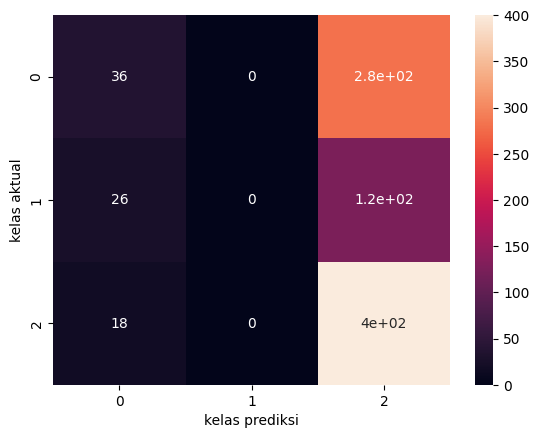

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('kelas prediksi')
plt.ylabel('kelas aktual')

## Unsupervised Learning

In [17]:
from sklearn.cluster import KMeans

2    736
1    734
3    726
6    654
0    648
4    515
5    411
Name: cluster, dtype: int64


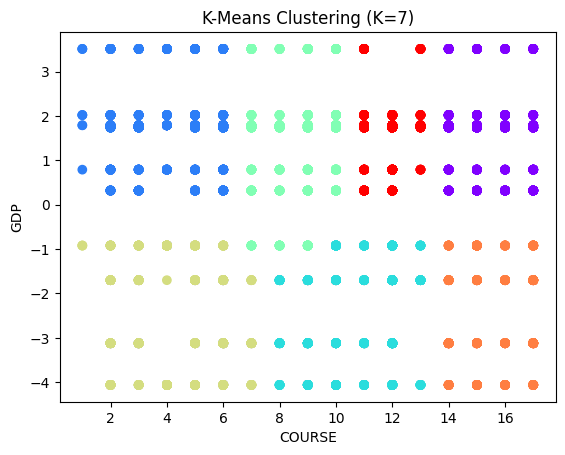

In [22]:
df = pd.read_csv('Predict_students_dropout_and_academic_success.csv')
X = df[['Course', 'GDP']] 
K = 7

kmeans = KMeans(n_clusters=K, random_state=0)

df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

plt.scatter(X['Course'], X['GDP'], c=df['cluster'], cmap='rainbow')
plt.xlabel('COURSE')
plt.ylabel('GDP')
plt.title('K-Means Clustering (K={})'.format(K))
plt.show()


## Hasil klustering K-Means pada dataset ini menghasilkan distribusi data sebagai berikut:

## Kluster 0: 648 data
## Kluster 1: 734 data
## Kluster 2: 736 data
## Kluster 3: 726 data
## Kluster 4: 515 data
## Kluster 5: 411 data
## Kluster 6: 654 data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Cluster
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,3
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,6
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,1
5,2,12,1,17,0,12,1,22,27,10,...,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate,6
6,1,1,1,12,1,1,1,13,28,8,...,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate,2
7,1,9,4,11,1,1,1,22,27,10,...,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout,2
8,1,1,3,10,1,1,15,1,1,10,...,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate,2
9,1,1,1,10,1,1,1,1,14,5,...,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout,3
